In [1]:
import pandas as pd
import numpy as np

In [2]:
#to plot within notebook
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
#setting figure size
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 20,10

In [4]:
#for normalizing data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

In [5]:
#read the file
df = pd.read_csv('Train.csv')

In [6]:
df.head()

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,labels
0,-0.276515,-0.424429,1.344997,-0.012283,0.076230,1.076648,0.182198,3,0,1,0,0,0,0,10,2,1
1,0.853573,0.150991,0.503892,-0.979179,-0.569351,-0.411453,-0.251940,4,1,2,0,1,0,0,0,3,0
2,0.947747,-0.173832,1.825628,-0.703478,0.076230,-0.411453,-0.251940,6,1,2,0,0,0,0,5,3,0
3,0.853573,-0.381404,0.984523,-0.039464,-0.569351,-0.411453,-0.251940,4,0,2,0,1,0,0,5,3,0
4,1.324443,1.590527,-1.178318,-0.097711,-0.246560,-0.411453,-0.251940,0,1,1,0,0,0,0,8,3,0


In [7]:
#total number of rows and columns in the data set
df.shape

(33908, 17)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33908 entries, 0 to 33907
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   feature_0   33908 non-null  float64
 1   feature_1   33908 non-null  float64
 2   feature_2   33908 non-null  float64
 3   feature_3   33908 non-null  float64
 4   feature_4   33908 non-null  float64
 5   feature_5   33908 non-null  float64
 6   feature_6   33908 non-null  float64
 7   feature_7   33908 non-null  int64  
 8   feature_8   33908 non-null  int64  
 9   feature_9   33908 non-null  int64  
 10  feature_10  33908 non-null  int64  
 11  feature_11  33908 non-null  int64  
 12  feature_12  33908 non-null  int64  
 13  feature_13  33908 non-null  int64  
 14  feature_14  33908 non-null  int64  
 15  feature_15  33908 non-null  int64  
 16  labels      33908 non-null  int64  
dtypes: float64(7), int64(10)
memory usage: 4.4 MB


In [9]:
df.describe()

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,labels
count,33908.000000,33908.000000,33908.000000,33908.000000,33908.000000,33908.000000,33908.000000,33908.000000,33908.000000,33908.000000,33908.000000,33908.000000,33908.000000,33908.000000,33908.000000,33908.000000,33908.000000
mean,-0.004158,0.002584,-0.000213,-0.000053,-0.000298,-0.004652,-0.007498,4.336381,1.171051,1.225345,0.018137,0.555503,0.159667,0.639407,5.520497,2.562375,0.116993
std,0.999776,1.014268,1.000872,1.002512,1.003724,0.993984,0.802696,3.273376,0.606730,0.749104,0.133450,0.496917,0.366303,0.897627,3.003241,0.987148,0.321417
min,-2.159994,-3.081149,-1.779108,-1.002478,-0.569351,-0.411453,-0.251940,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-0.747384,-0.422787,-0.938003,-0.602517,-0.569351,-0.411453,-0.251940,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,3.000000,3.000000,0.000000
50%,-0.182341,-0.297324,0.023260,-0.303517,-0.246560,-0.411453,-0.251940,4.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,6.000000,3.000000,0.000000
75%,0.665225,0.022901,0.624050,0.236237,0.076230,-0.411453,-0.251940,7.000000,2.000000,2.000000,0.000000,1.000000,0.000000,2.000000,8.000000,3.000000,0.000000
max,5.091402,33.094776,1.825628,18.094700,19.443647,8.127648,23.625644,11.000000,2.000000,3.000000,1.000000,1.000000,1.000000,2.000000,11.000000,3.000000,1.000000


In [10]:
#correlation matrix
df.corr(method="pearson")

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,labels
feature_0,1.000000,0.096391,-0.011224,-0.007262,0.003125,-0.021076,0.003105,-0.020858,-0.406850,-0.105244,-0.020580,-0.182078,-0.015597,0.028699,-0.040374,0.006381,0.019405
feature_1,0.096391,1.000000,0.005365,0.017720,-0.013162,0.004524,0.021292,0.018648,-0.000714,0.065006,-0.066072,-0.070495,-0.083485,-0.030686,0.015220,-0.021289,0.048611
feature_2,-0.011224,0.005365,1.000000,-0.031505,0.162574,-0.095046,-0.055874,0.023044,-0.006331,0.022440,0.012235,-0.027770,0.007430,-0.029314,-0.005105,0.084358,-0.033345
feature_3,-0.007262,0.017720,-0.031505,1.000000,-0.084617,0.001482,0.001489,0.000688,0.011788,0.003468,-0.010831,0.009210,-0.009263,-0.020733,0.006277,0.009662,0.392971
feature_4,0.003125,-0.013162,0.162574,-0.084617,1.000000,-0.091533,-0.045145,0.007676,-0.009894,0.004970,0.017115,-0.020753,0.005064,0.024970,-0.109652,0.105265,-0.075025
feature_5,-0.021076,0.004524,-0.095046,0.001482,-0.091533,1.000000,0.547919,-0.022786,0.017101,0.003437,-0.027930,0.122215,-0.022871,-0.243657,0.031530,-0.856851,0.106239
feature_6,0.003105,0.021292,-0.055874,0.001489,-0.045145,0.547919,1.000000,0.001753,0.019752,0.021266,-0.018799,0.039526,-0.010990,-0.176610,0.030134,-0.594264,0.119322
feature_7,-0.020858,0.018648,0.023044,0.000688,0.007676,-0.022786,0.001753,1.000000,0.058998,0.163618,-0.007553,-0.124799,-0.034169,-0.080982,-0.091335,0.009890,0.038588
feature_8,-0.406850,-0.000714,-0.006331,0.011788,-0.009894,0.017101,0.019752,0.058998,1.000000,0.108495,-0.005900,-0.014665,-0.046986,-0.035879,-0.005906,-0.015697,0.046193
feature_9,-0.105244,0.065006,0.022440,0.003468,0.004970,0.003437,0.021266,0.163618,0.108495,1.000000,-0.013744,-0.090923,-0.046003,-0.112665,-0.058534,-0.022458,0.068356


In [11]:
'''from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
#data = pd.read_csv("D://Blogs//train.csv")

X = df.iloc[:,0:15]  #independent columns
y = df.iloc[:,-1]    #target column i.e price range

#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(10,'Score'))  #print 10 best features'''

'from sklearn.feature_selection import SelectKBest\nfrom sklearn.feature_selection import chi2\n#data = pd.read_csv("D://Blogs//train.csv")\n\nX = df.iloc[:,0:15]  #independent columns\ny = df.iloc[:,-1]    #target column i.e price range\n\n#apply SelectKBest class to extract top 10 best features\nbestfeatures = SelectKBest(score_func=chi2, k=10)\nfit = bestfeatures.fit(X,y)\ndfscores = pd.DataFrame(fit.scores_)\ndfcolumns = pd.DataFrame(X.columns)\n#concat two dataframes for better visualization \nfeatureScores = pd.concat([dfcolumns,dfscores],axis=1)\nfeatureScores.columns = [\'Specs\',\'Score\']  #naming the dataframe columns\nprint(featureScores.nlargest(10,\'Score\'))  #print 10 best features'

[0.10341243 0.09816432 0.09923085 0.25279299 0.06142674 0.05839783
 0.040889   0.06101976 0.02646421 0.03515592 0.00268033 0.02320085
 0.00973775 0.02661401 0.10081301]


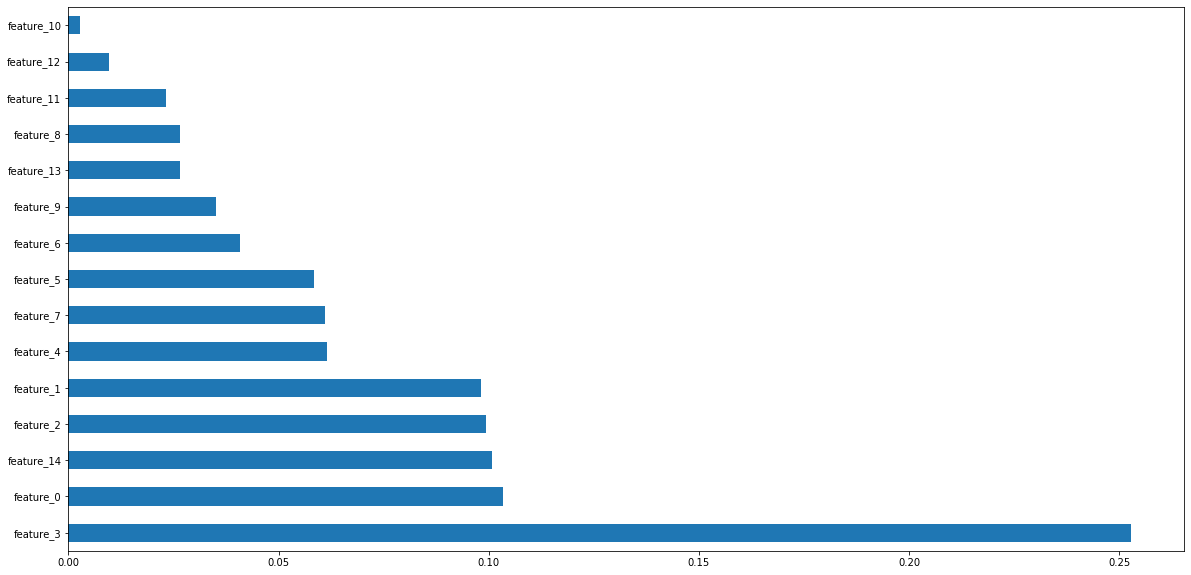

In [12]:
import pandas as pd
import numpy as np
#data = pd.read_csv("D://Blogs//train.csv")
X = df.iloc[:,0:15]  #independent columns
y = df.iloc[:,-1]    #target column i.e price range

from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt

model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_)
#use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(16).plot(kind='barh')
plt.show()



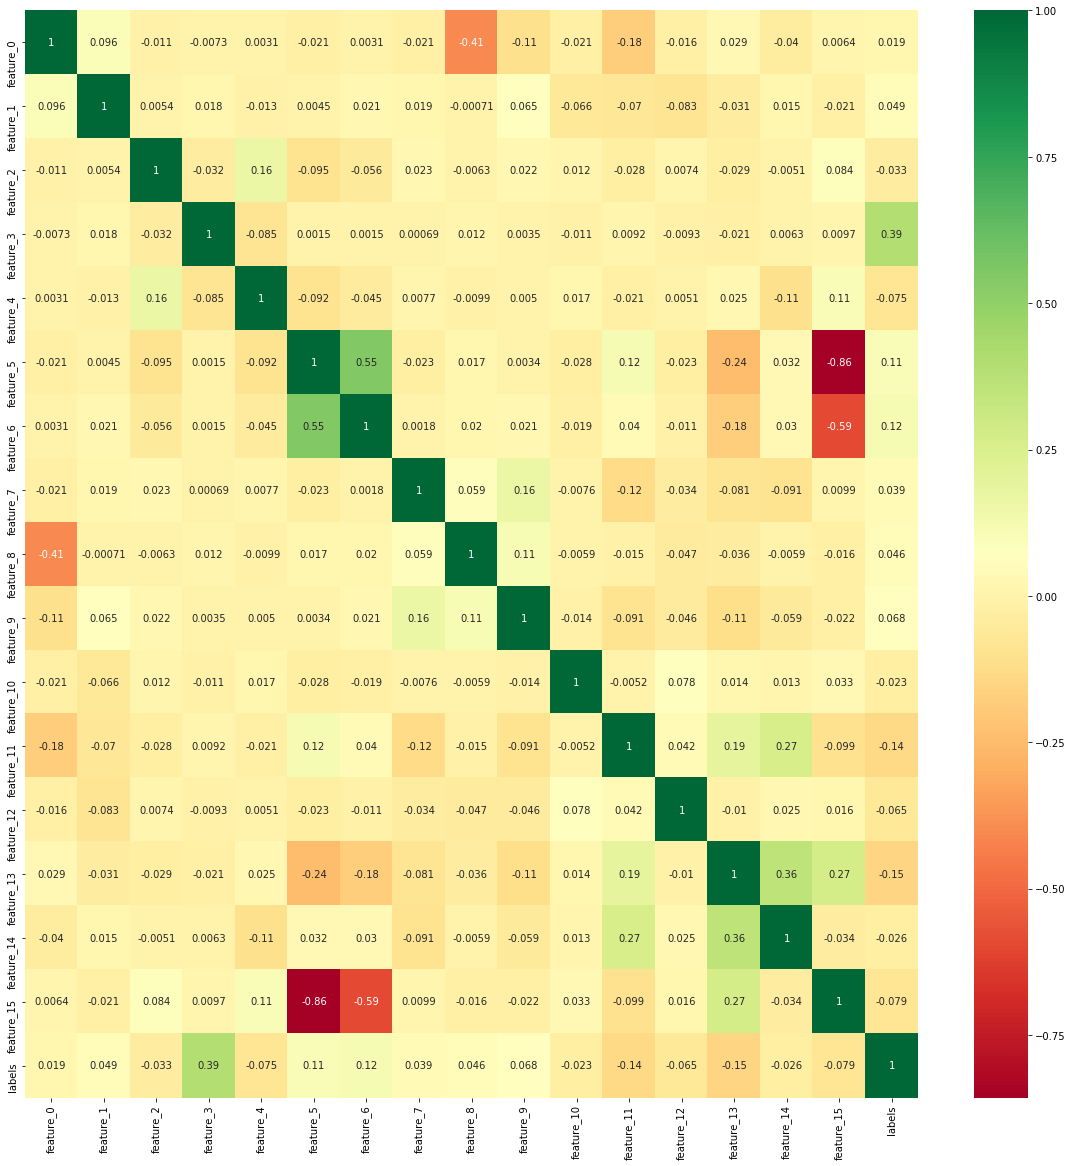

In [13]:
import pandas as pd
import numpy as np
import seaborn as sns

#data = pd.read_csv("D://Blogs//train.csv")

X = df.iloc[:,0:16]  #independent columns
y = df.iloc[:,-1]    #target column i.e price range
#get correlations of each features in dataset

corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))

#plot heat map
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [14]:
#!pip install lightgbm

#import lightgbm

In [15]:
#importing libraries
from sklearn.datasets import load_boston
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso#Loading the dataset

x = df

df = pd.DataFrame(df, columns = df.columns)
df["labels"] = x.labels
X = df.drop("labels",1)   #Feature Matrix
y = df["labels"]          #Target Variable
df.head()

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,labels
0,-0.276515,-0.424429,1.344997,-0.012283,0.076230,1.076648,0.182198,3,0,1,0,0,0,0,10,2,1
1,0.853573,0.150991,0.503892,-0.979179,-0.569351,-0.411453,-0.251940,4,1,2,0,1,0,0,0,3,0
2,0.947747,-0.173832,1.825628,-0.703478,0.076230,-0.411453,-0.251940,6,1,2,0,0,0,0,5,3,0
3,0.853573,-0.381404,0.984523,-0.039464,-0.569351,-0.411453,-0.251940,4,0,2,0,1,0,0,5,3,0
4,1.324443,1.590527,-1.178318,-0.097711,-0.246560,-0.411453,-0.251940,0,1,1,0,0,0,0,8,3,0


In [16]:
#Correlation with output variable
cor = df.corr()
cor_target = abs(cor["labels"])#Selecting highly correlated features
relevant_features = cor_target[cor_target>0]
relevant_features

feature_0     0.019405
feature_1     0.048611
feature_2     0.033345
feature_3     0.392971
feature_4     0.075025
feature_5     0.106239
feature_6     0.119322
feature_7     0.038588
feature_8     0.046193
feature_9     0.068356
feature_10    0.023344
feature_11    0.135662
feature_12    0.065480
feature_13    0.148583
feature_14    0.026178
feature_15    0.079190
labels        1.000000
Name: labels, dtype: float64

In [17]:
reg = LassoCV()
reg.fit(X, y)
print("Best alpha using built-in LassoCV: %f" % reg.alpha_)
print("Best score using built-in LassoCV: %f" %reg.score(X,y))
coef = pd.Series(reg.coef_, index = X.columns)

Best alpha using built-in LassoCV: 0.000127
Best score using built-in LassoCV: 0.212259


In [18]:
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

Lasso picked 16 variables and eliminated the other 0 variables


Text(0.5, 1.0, 'Feature importance using Lasso Model')

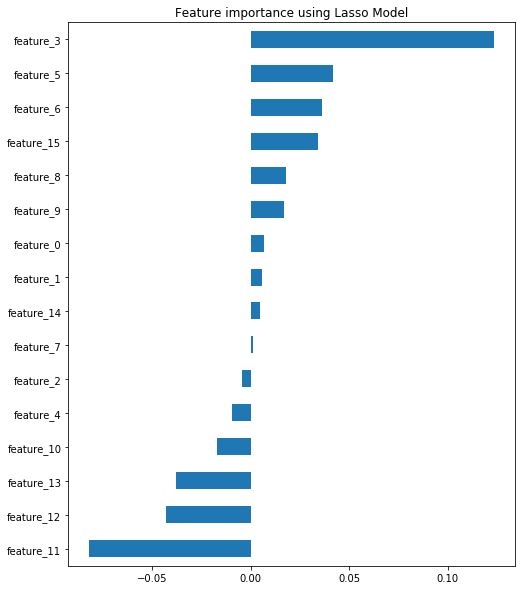

In [19]:
imp_coef = coef.sort_values()
import matplotlib
matplotlib.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Feature importance using Lasso Model")

In [20]:
df1 = df[['feature_3','feature_5','feature_6','feature_15','feature_8','feature_9','feature_0','feature_1','feature_14','labels']]

In [21]:
df1.head()

,feature_3,feature_5,feature_6,feature_15,feature_8,feature_9,feature_0,feature_1,feature_14,labels
0,-0.012283,1.076648,0.182198,2,0,1,-0.276515,-0.424429,10,1
1,-0.979179,-0.411453,-0.251940,3,1,2,0.853573,0.150991,0,0
2,-0.703478,-0.411453,-0.251940,3,1,2,0.947747,-0.173832,5,0
3,-0.039464,-0.411453,-0.251940,3,0,2,0.853573,-0.381404,5,0
4,-0.097711,-0.411453,-0.251940,3,1,1,1.324443,1.590527,8,0


#### Logistic regression

In [22]:
from sklearn.model_selection import train_test_split
#X = train.drop('Loan_Status', axis=1)
X = df1.iloc[:,0:9].values# Separating out the target
y = df1.iloc[:,-1].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [23]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(solver = 'lbfgs')

In [24]:
lr.fit(X_train, y_train)
print("model score: %.3f" % lr.score(X_test, y_test))

model score: 0.891


In [25]:
test = pd.read_csv('Test.csv')
test = test[['feature_3','feature_5','feature_6','feature_15','feature_8','feature_9','feature_0','feature_1','feature_14']]
test_pred = lr.predict(test)

In [26]:
lr.score(X_test, y_test)

0.8910350928929519

#### K Neighbor Classifier

In [27]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

In [28]:
X = df1.iloc[:,0:9].values# Separating out the target
y = df1.iloc[:,-1].values

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=6)

# check classification accuracy of KNN with K=5
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
metrics.accuracy_score(y_test, y_pred)

0.8945381620856435

#### Decision Tree Classifier

In [37]:
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
#from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
from sklearn import tree
from sklearn import metrics

In [38]:
clf = tree.DecisionTreeClassifier()
#clf = clf.fit(X, y)

In [39]:
data = df1[['feature_3','feature_5','feature_6','feature_15','feature_8','feature_9','feature_0','feature_1','feature_14']]

In [40]:
X = df1.iloc[:,0:9].values# Separating out the target
y = df1.iloc[:,-1].values

In [44]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [52]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion='entropy', max_depth=3)

# Train Decision Tree Classifer
clf = clf.fit(X_train,Y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [53]:
print("Accuracy:",metrics.accuracy_score(Y_test, y_pred))

Accuracy: 0.8952128182443724


### Visualize Decision Tree

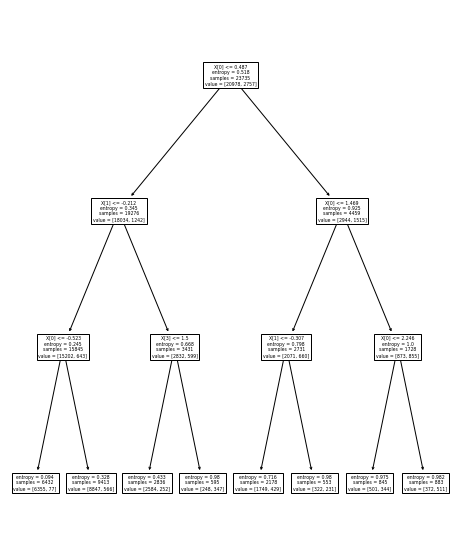

In [54]:
tree.plot_tree(clf);

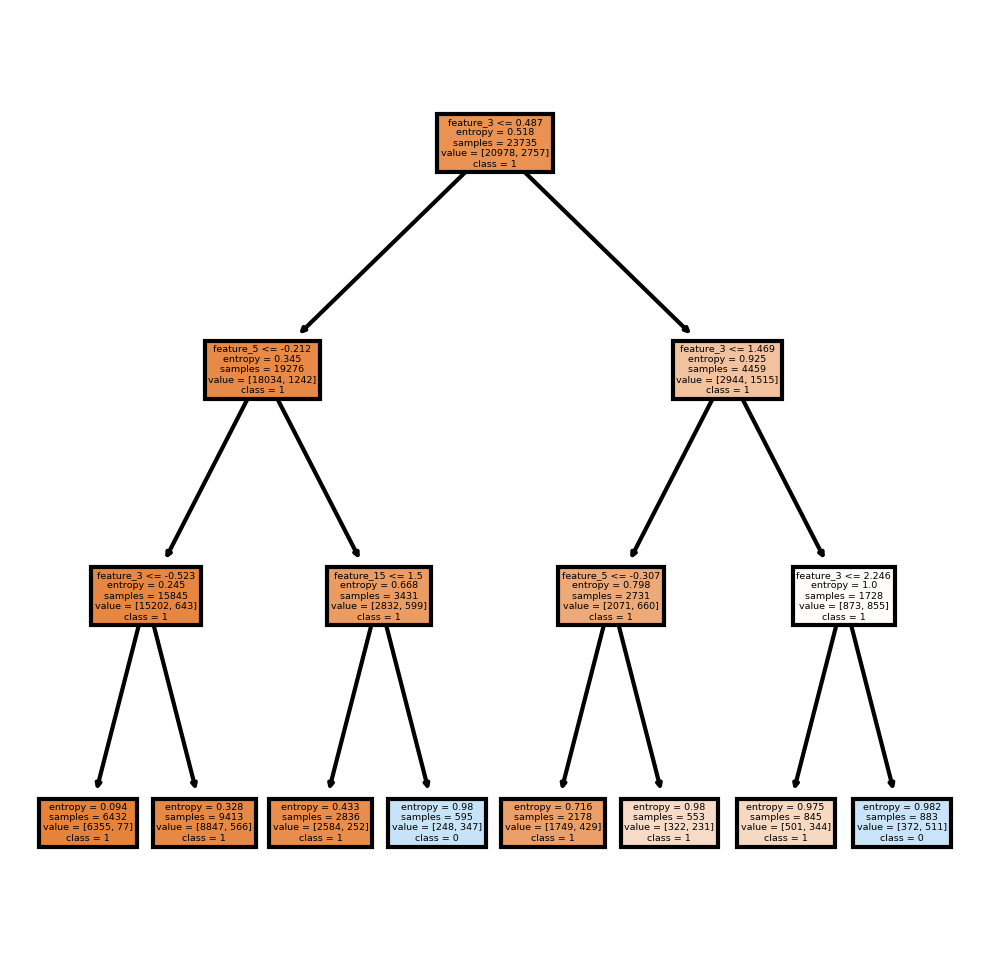

In [55]:
fn=['feature_3','feature_5','feature_6','feature_15','feature_8','feature_9','feature_0','feature_1','feature_14']
cn=['1', '0']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(clf,
               feature_names = fn, 
               class_names=cn,
               filled = True);

In [58]:
#submission_df_1 = pd.DataFrame({
#                 "labels": test_pred})

In [59]:
#submission_df_1.to_excel("submission2.xlsx", index = False)

## Random Forest Classifier

In [60]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

In [61]:
data = df1[['feature_3','feature_5','feature_6','feature_15','feature_8','feature_9','feature_0','feature_1','feature_14']]

In [62]:
X = df1.iloc[:,0:9].values# Separating out the target
y = df1.iloc[:,-1].values

In [63]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [69]:
clf = RandomForestClassifier(n_estimators=100, max_depth=3, random_state=0)
clf.fit(X, y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=3, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [72]:
print(clf.feature_importances_)

y_pred = clf.predict(X_test)

[0.47700402 0.10073883 0.04774731 0.22331268 0.00424681 0.0019768
 0.05540986 0.00408699 0.08547671]


In [73]:
clf.score(X, y, sample_weight=None)

0.8888167983956589

In [74]:
metrics.accuracy_score(Y_test, y_pred)

0.8900554441429751

### Gradient Boosting Classifier

In [75]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import GradientBoostingClassifier

In [76]:
data = df1[['feature_3','feature_5','feature_6','feature_15','feature_8','feature_9','feature_0','feature_1','feature_14']]

In [77]:
X = df1.iloc[:,0:9].values# Separating out the target
y = df1.iloc[:,-1].values

In [78]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.3, random_state=12)

In [79]:
lr_list = [0.05, 0.075, 0.1, 0.25, 0.5, 0.75, 1]

for learning_rate in lr_list:
    gb_clf = GradientBoostingClassifier(n_estimators=20, learning_rate=learning_rate, max_features=2, max_depth=2, random_state=0)
    gb_clf.fit(X_train, y_train)

    print("Learning rate: ", learning_rate)
    print("Accuracy score (training): {0:.3f}".format(gb_clf.score(X_train, y_train)))
    print("Accuracy score (validation): {0:.3f}".format(gb_clf.score(X_val, y_val)))

Learning rate:  0.05
Accuracy score (training): 0.881
Accuracy score (validation): 0.888
Learning rate:  0.075
Accuracy score (training): 0.881
Accuracy score (validation): 0.888
Learning rate:  0.1
Accuracy score (training): 0.881
Accuracy score (validation): 0.888
Learning rate:  0.25
Accuracy score (training): 0.881
Accuracy score (validation): 0.888
Learning rate:  0.5
Accuracy score (training): 0.882
Accuracy score (validation): 0.887
Learning rate:  0.75
Accuracy score (training): 0.882
Accuracy score (validation): 0.886
Learning rate:  1
Accuracy score (training): 0.882
Accuracy score (validation): 0.888


In [80]:
gb_clf2 = GradientBoostingClassifier(n_estimators=20, learning_rate=0.5, max_features=2, max_depth=2, random_state=0)
gb_clf2.fit(X_train, y_train)
predictions = gb_clf2.predict(X_val)

print("Confusion Matrix:")
print(confusion_matrix(y_val, predictions))

print("Classification Report")
print(classification_report(y_val, predictions))

Confusion Matrix:
[[6770    7]
 [ 853    0]]
Classification Report
              precision    recall  f1-score   support

           0       0.89      1.00      0.94      6777
           1       0.00      0.00      0.00       853

    accuracy                           0.89      7630
   macro avg       0.44      0.50      0.47      7630
weighted avg       0.79      0.89      0.84      7630



### Ada Boosting Classifier

In [111]:
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier, ExtraTreesClassifier
from sklearn.model_selection import train_test_split, KFold, cross_val_score

In [112]:
k_folds = KFold(n_splits=20, random_state=12)

num_estimators = [20, 40, 60, 80, 100]

for i in num_estimators:
    ada_boost = AdaBoostClassifier(n_estimators=i, random_state=12)
    results = cross_val_score(ada_boost, X_train, y_train, cv=k_folds)
    print("Results for {} estimators:".format(i))
    print(results.mean())

C:\Users\Parth Shah\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


Results for 20 estimators:
0.8815639892511495
Results for 40 estimators:
0.8815639892511495
Results for 60 estimators:
0.8814493103520669
Results for 80 estimators:
0.8807612369575712
Results for 100 estimators:
0.8806465580584888


### XGBoost Classifier

In [83]:
from xgboost import XGBClassifier

In [84]:
xgb_clf = XGBClassifier()
xgb_clf.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method=None,
              validate_parameters=False, verbosity=None)

In [85]:
score = xgb_clf.score(X_val, y_val)

In [86]:
print(score)

0.8855832241153342


### Voting Classifier

In [93]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import VotingClassifier
from sklearn.svm import SVC

In [94]:
data = df1[['feature_3','feature_5','feature_6','feature_15','feature_8','feature_9','feature_0','feature_1','feature_14']]

In [95]:
X = df1.iloc[:,0:9].values# Separating out the target
y = df1.iloc[:,-1].values

In [96]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.3, random_state=12)

In [103]:
LogReg_clf = LogisticRegression()
DTree_clf = DecisionTreeClassifier()
SVC_clf = SVC()

LogReg_clf.fit(X_train, y_train)
DTree_clf.fit(X_train, y_train)
SVC_clf.fit(X_train, y_train)

LogReg_pred = LogReg_clf.predict(X_val)
DTree_pred = DTree_clf.predict(X_val)
SVC_pred = SVC_clf.predict(X_val)

averaged_preds = (LogReg_pred + DTree_pred + SVC_pred)//3
acc = metrics.accuracy_score(y_val, averaged_preds)
print(acc)

0.871856607811664


In [107]:
voting_clf = VotingClassifier(estimators=[('SVC', SVC_clf), ('DTree', DTree_clf), ('LogReg', LogReg_clf)], voting='hard')
voting_clf.fit(X_train, y_train)
preds = voting_clf.predict(X_val)
acc = metrics.accuracy_score(y_val, preds)
l_loss = metrics.log_loss(y_val, preds)
f1 = metrics.f1_score(y_val, preds)

print("Accuracy is: " + str(acc))
print("Log Loss is: " + str(l_loss))
print("F1 Score is: " + str(f1))

Accuracy is: 0.871856607811664
Log Loss is: 4.425915969278282
F1 Score is: 0.0


### SVM

In [113]:
data = df1[['feature_3','feature_5','feature_6','feature_15','feature_8','feature_9','feature_0','feature_1','feature_14']]

In [114]:
X = df1.iloc[:,0:9].values# Separating out the target
y = df1.iloc[:,-1].values

In [115]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.3, random_state=12)

In [116]:
from sklearn import svm

In [117]:
#Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel

In [118]:
#Train the model using the training sets
clf.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [119]:
#Predict the response for test dataset
y_pred = clf.predict(X_val)

In [120]:
metrics.accuracy_score(y_val, y_pred)

0.8754298815437523